# Aniket Patil
## Project 1
### github:https://github.com/aniketpatil91/Auto_Mpg/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings; warnings.simplefilter('ignore')

In [2]:
data = pd.read_csv('mpg.csv')

In [3]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
name            398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
# Null data not found
data.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model_year      False
origin          False
name            False
dtype: bool

In [6]:
# checking unique values
data['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148', '129',
       '96', '71', '98', '115', '53', '81', '79', '120', '152', '102',
       '108', '68', '58', '149', '89', '63', '48', '66', '139', '103',
       '125', '133', '138', '135', '142', '77', '62', '132', '84', '64',
       '74', '116', '82'], dtype=object)

In [7]:
# checking records with '?' symbol

data[data['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [8]:
# removing records with '?' symbol
data = data[data['horsepower'] != '?']
data['horsepower']=data['horsepower'].astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
model_year      392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


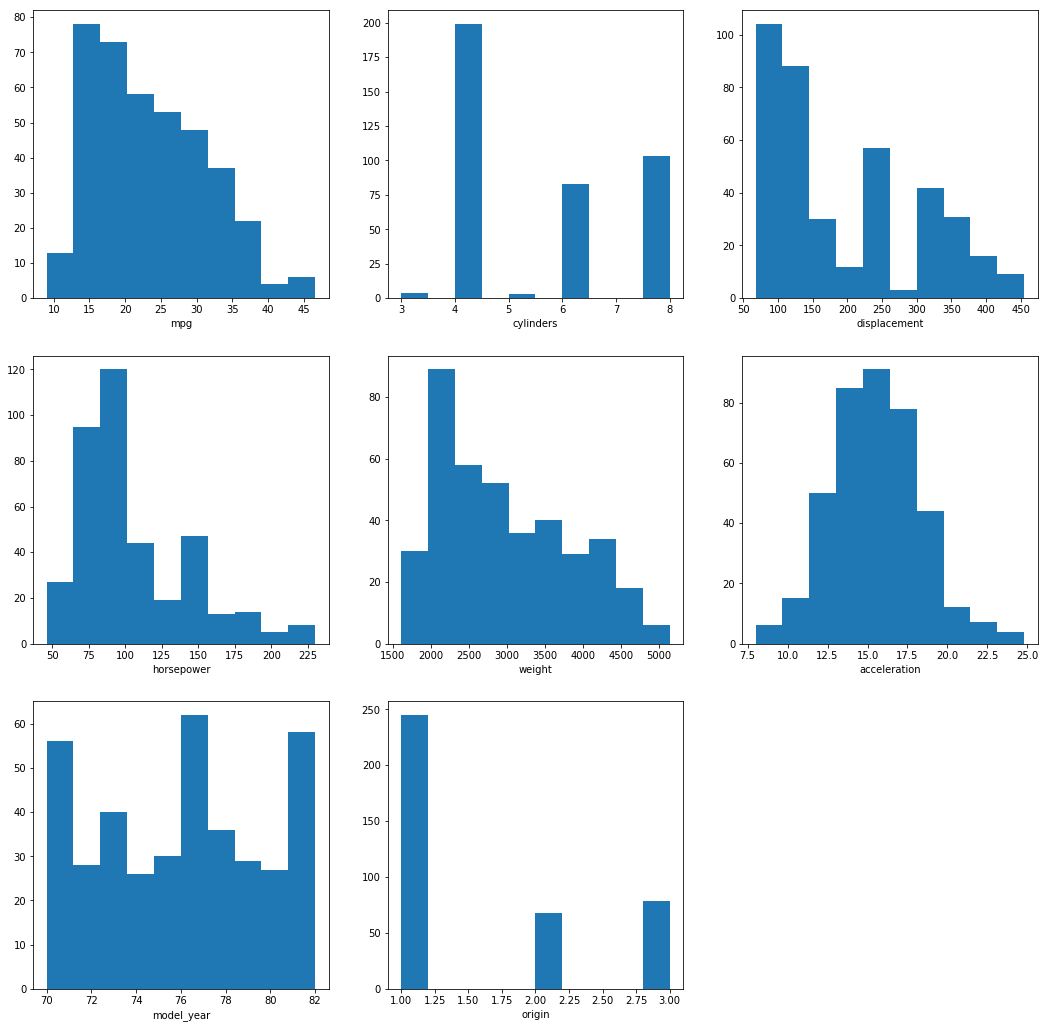

In [9]:
# Histogram for all variables
nrows, ncols = 3, 3

x = np.linspace(0,10,100)
var = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight','acceleration', 'model_year', 'origin']
fig = plt.figure(figsize=(18,18))    
for i, var in enumerate(var,1):
    ax = fig.add_subplot(nrows, ncols, i)
    ax.hist(data[var])
    ax.set_xlabel(var)
plt.show()


Text(0,0.5,'MPG')

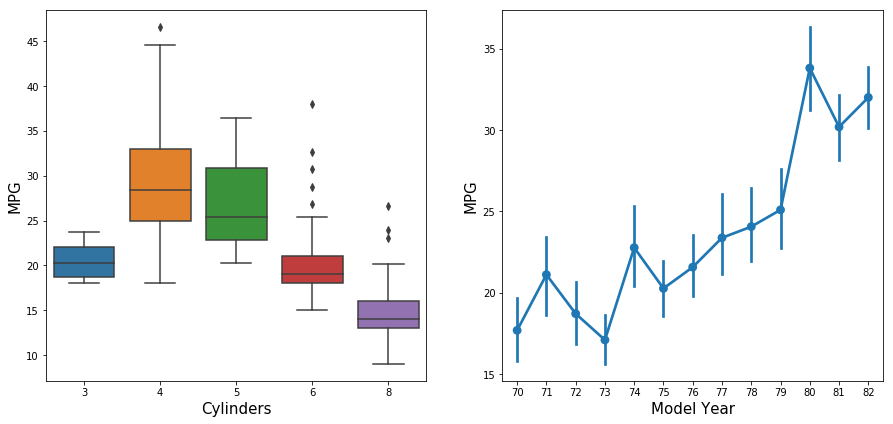

In [10]:
# Relationship between MPG and cylinders, Model year
fig = plt.figure(figsize=(15,15))
ax1 = plt.subplot2grid((2,2), (0,0))
ax2 = plt.subplot2grid((2,2), (0,1))

sns.boxplot(data['cylinders'],data['mpg'], ax=ax1)
ax1.set_xlabel('Cylinders',fontsize=15)
ax1.set_ylabel('MPG',fontsize=15)

sns.pointplot(data['model_year'],data['mpg'])
ax2.set_xlabel('Model Year',fontsize=15)
ax2.set_ylabel('MPG',fontsize=15)


#### 1) The cars with 4 cylinders have greater mpg and mpg goes on decreasing as number of cylinders increase.
#### 2) As model year increases the mpg of cars have also increased. This may be beacause of increase in technology

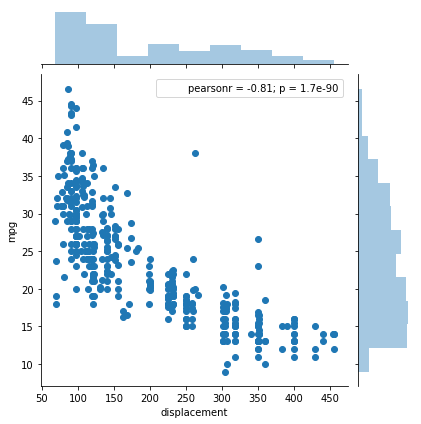

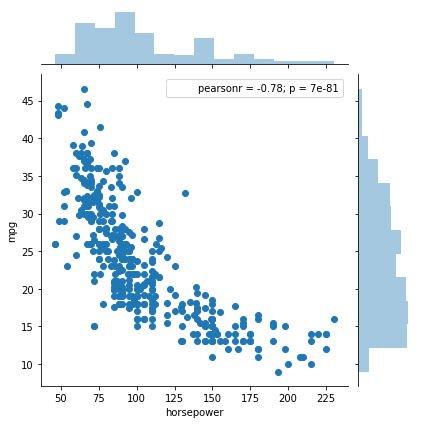

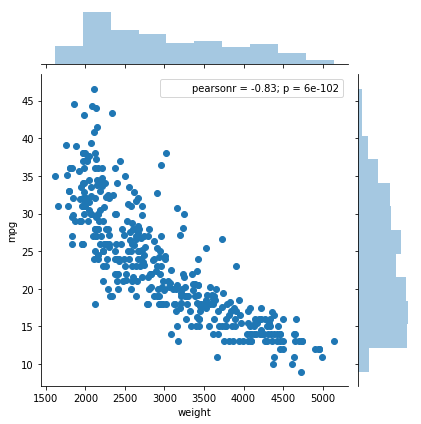

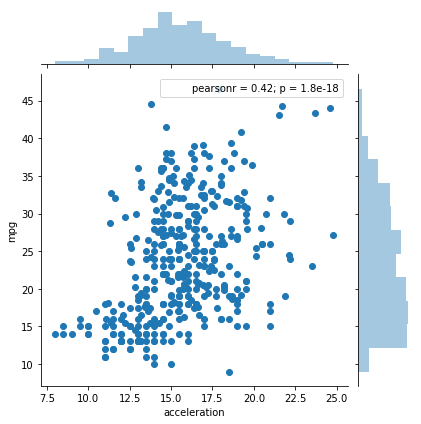

In [11]:
# Joint plot
sns.jointplot(x=data['displacement'],y=data['mpg'])
sns.jointplot(x=data['horsepower'],y=data['mpg'])
sns.jointplot(x=data['weight'],y=data['mpg'])
sns.jointplot(x=data['acceleration'],y=data['mpg'])

#### There seems to be no relation between accerleration and mpg

In [12]:
data['name'].value_counts().sort_values(ascending=False).head(10)

amc matador           5
ford pinto            5
toyota corolla        5
amc hornet            4
chevrolet chevette    4
ford maverick         4
toyota corona         4
chevrolet impala      4
amc gremlin           4
peugeot 504           4
Name: name, dtype: int64

In [13]:
#Splitting car brands from car names
data['car_brands'] = data['name'].str.split().str.get(0)

In [14]:
data['car_brands'].unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac', 'dodge',
       'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi', 'saab', 'bmw',
       'chevy', 'hi', 'mercury', 'opel', 'fiat', 'oldsmobile', 'chrysler',
       'mazda', 'volvo', 'renault', 'toyouta', 'maxda', 'honda', 'subaru',
       'chevroelt', 'capri', 'vw', 'mercedes-benz', 'cadillac', 'mercedes',
       'vokswagen', 'triumph', 'nissan'], dtype=object)

In [15]:
data['car_brands'] = data['car_brands'].replace(['vokswagen','vw'],'volkswagen')
data['car_brands'] = data['car_brands'].replace('maxda','mazda')
data['car_brands'] = data['car_brands'].replace('toyouta','toyota')
data['car_brands'] = data['car_brands'].replace('mercedes','mercedes-benz')
data['car_brands'] = data['car_brands'].replace('nissan','datsun')
data['car_brands'] = data['car_brands'].replace('capri','ford')
data['car_brands'] = data['car_brands'].replace(['chevroelt','chevy'],'chevrolet')

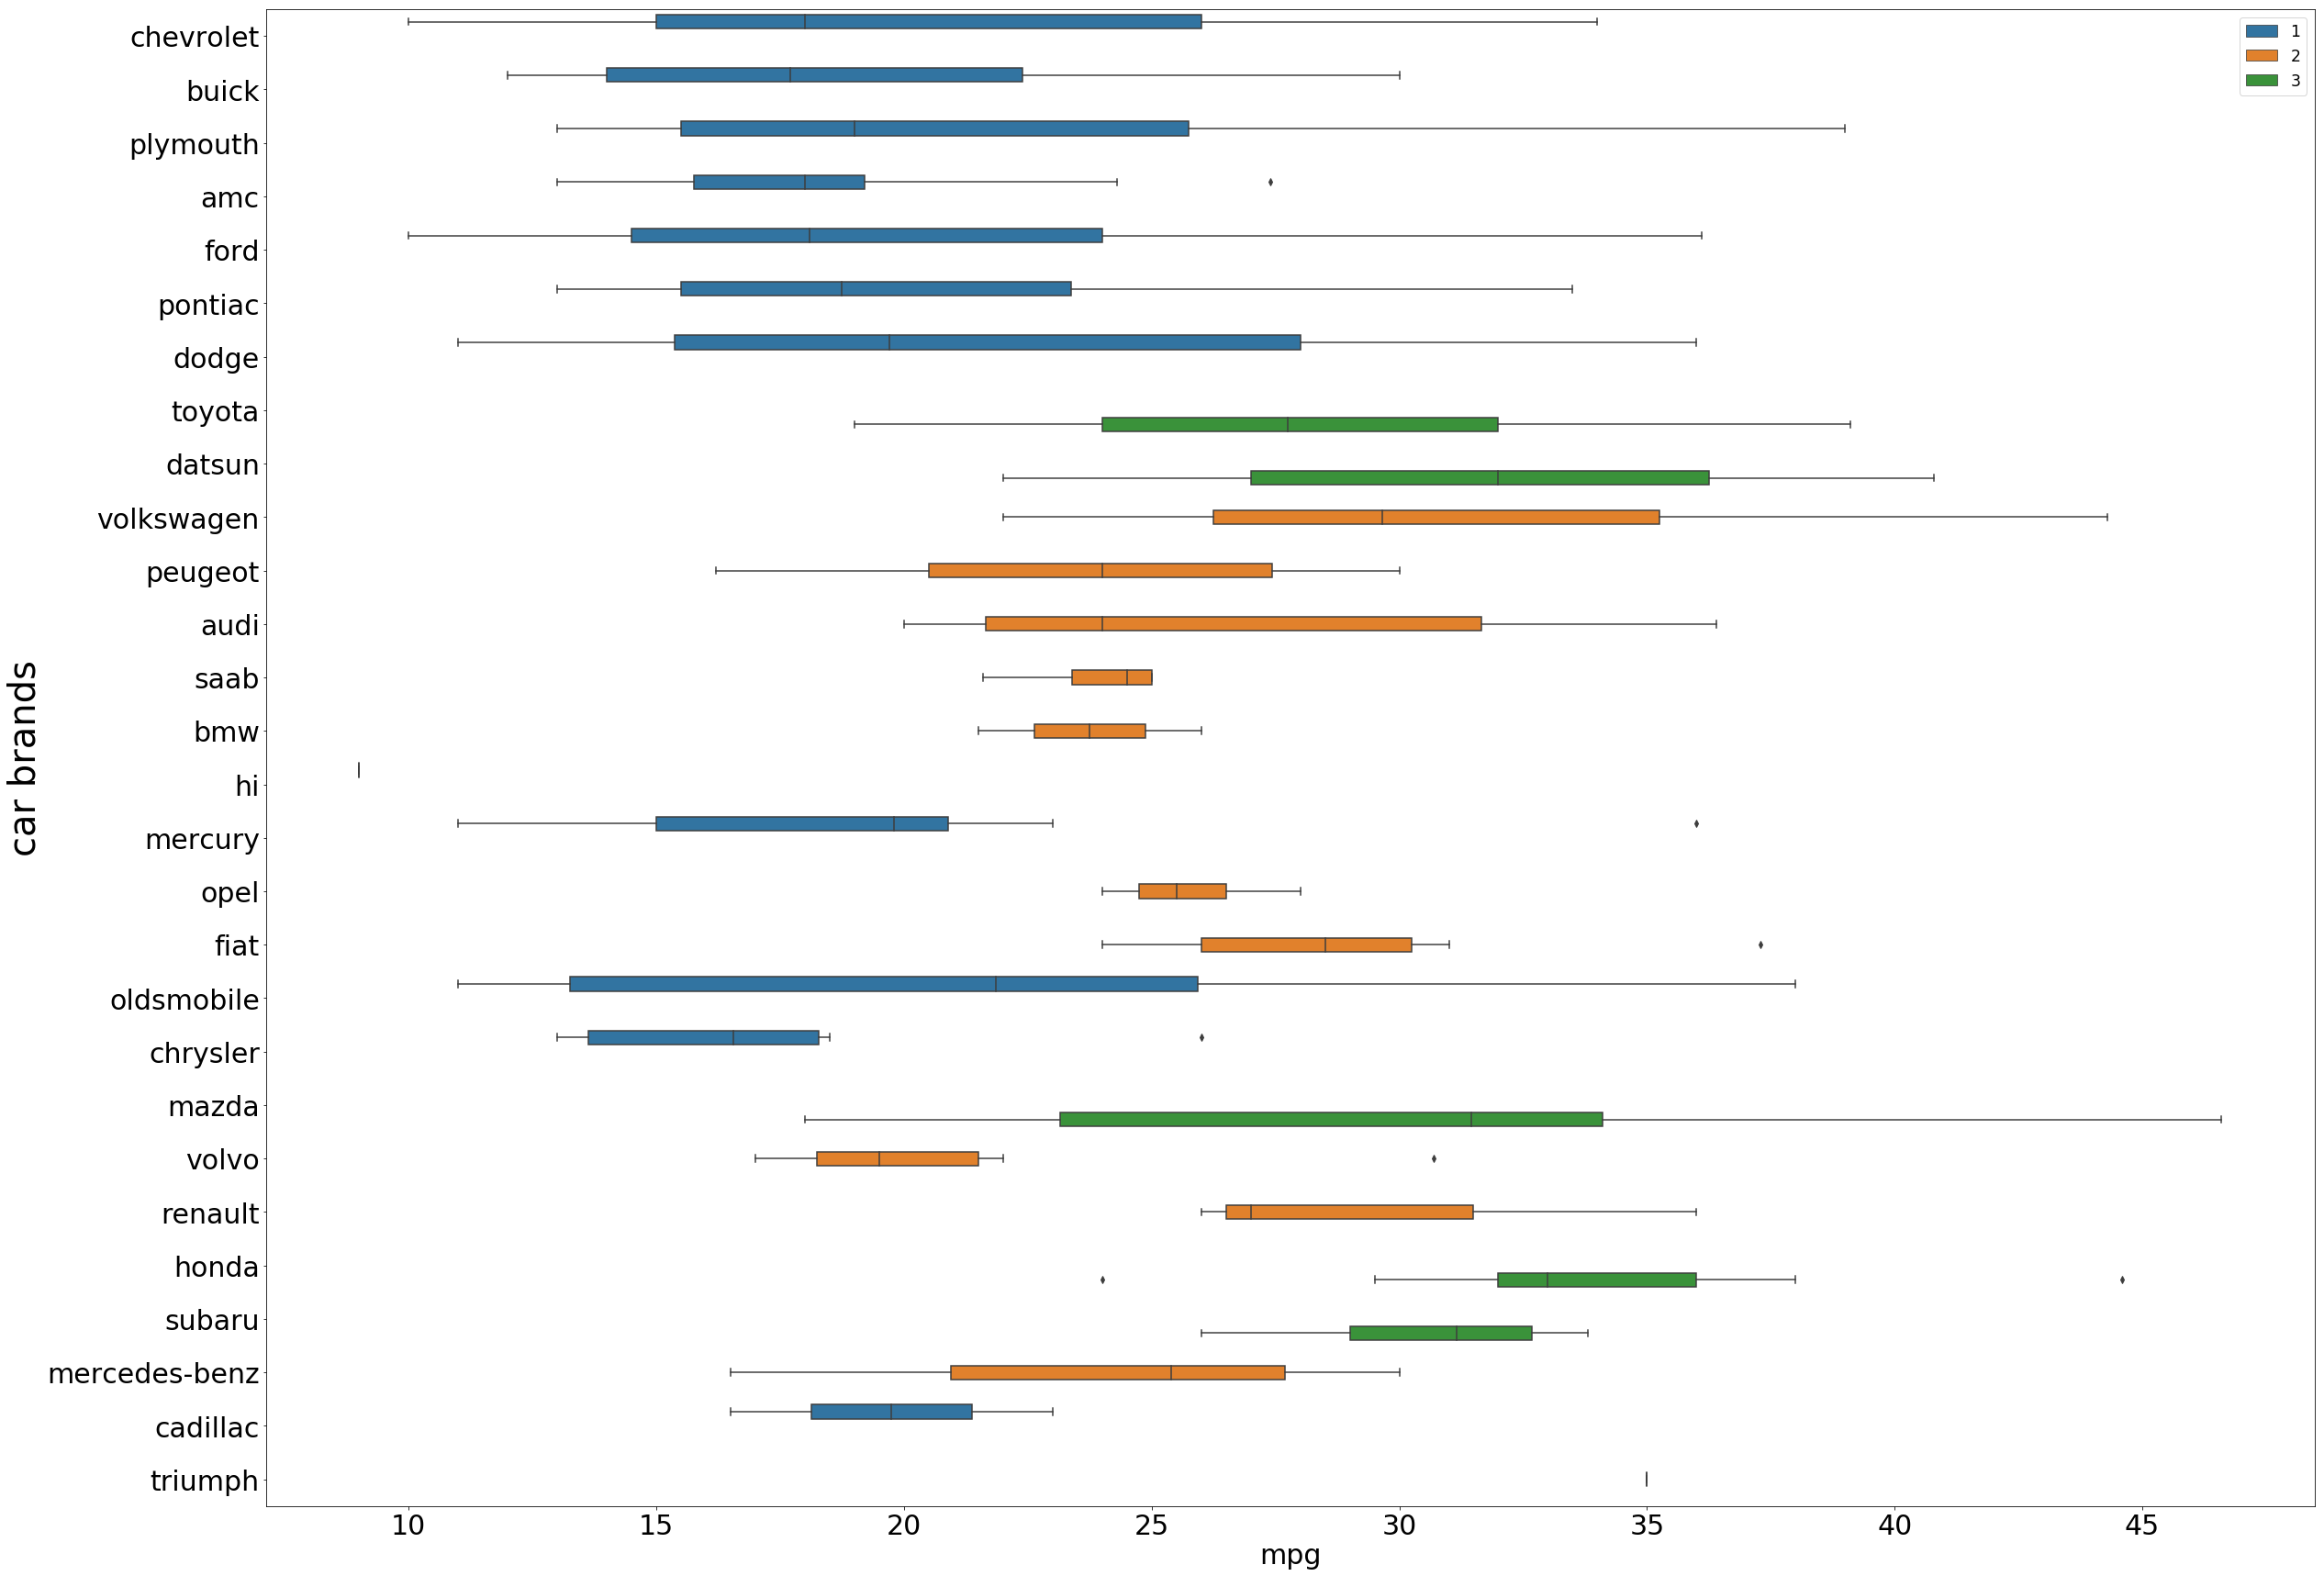

In [16]:
fig = plt.figure(figsize=(40,30))
fontsize2use = 30
plt.xticks(fontsize=fontsize2use)  
plt.yticks(fontsize=fontsize2use)
g = sns.boxplot(y=data['car_brands'],x=data['mpg'],hue=data['origin'])
g.set_xlabel('mpg',fontsize=30)
g.set_ylabel('car brands',fontsize=40)
g.legend(fontsize ='xx-large')

In [17]:
data[['origin','car_brands']].sort_values('origin',ascending=True).head(10)

,origin,car_brands
0,1,chevrolet
226,1,buick
225,1,chevrolet
224,1,mercury
223,1,dodge
222,1,oldsmobile
221,1,chevrolet
227,1,plymouth
219,1,plymouth
215,1,dodge


#### We can put values in origin column to USA, Europe and Japan.

In [18]:
data['country']=data['origin'].map({1:'Usa', 2:'Europe', 3:'Japan'})
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,car_brands,country
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet,Usa
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,buick,Usa
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,plymouth,Usa
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,amc,Usa
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,ford,Usa


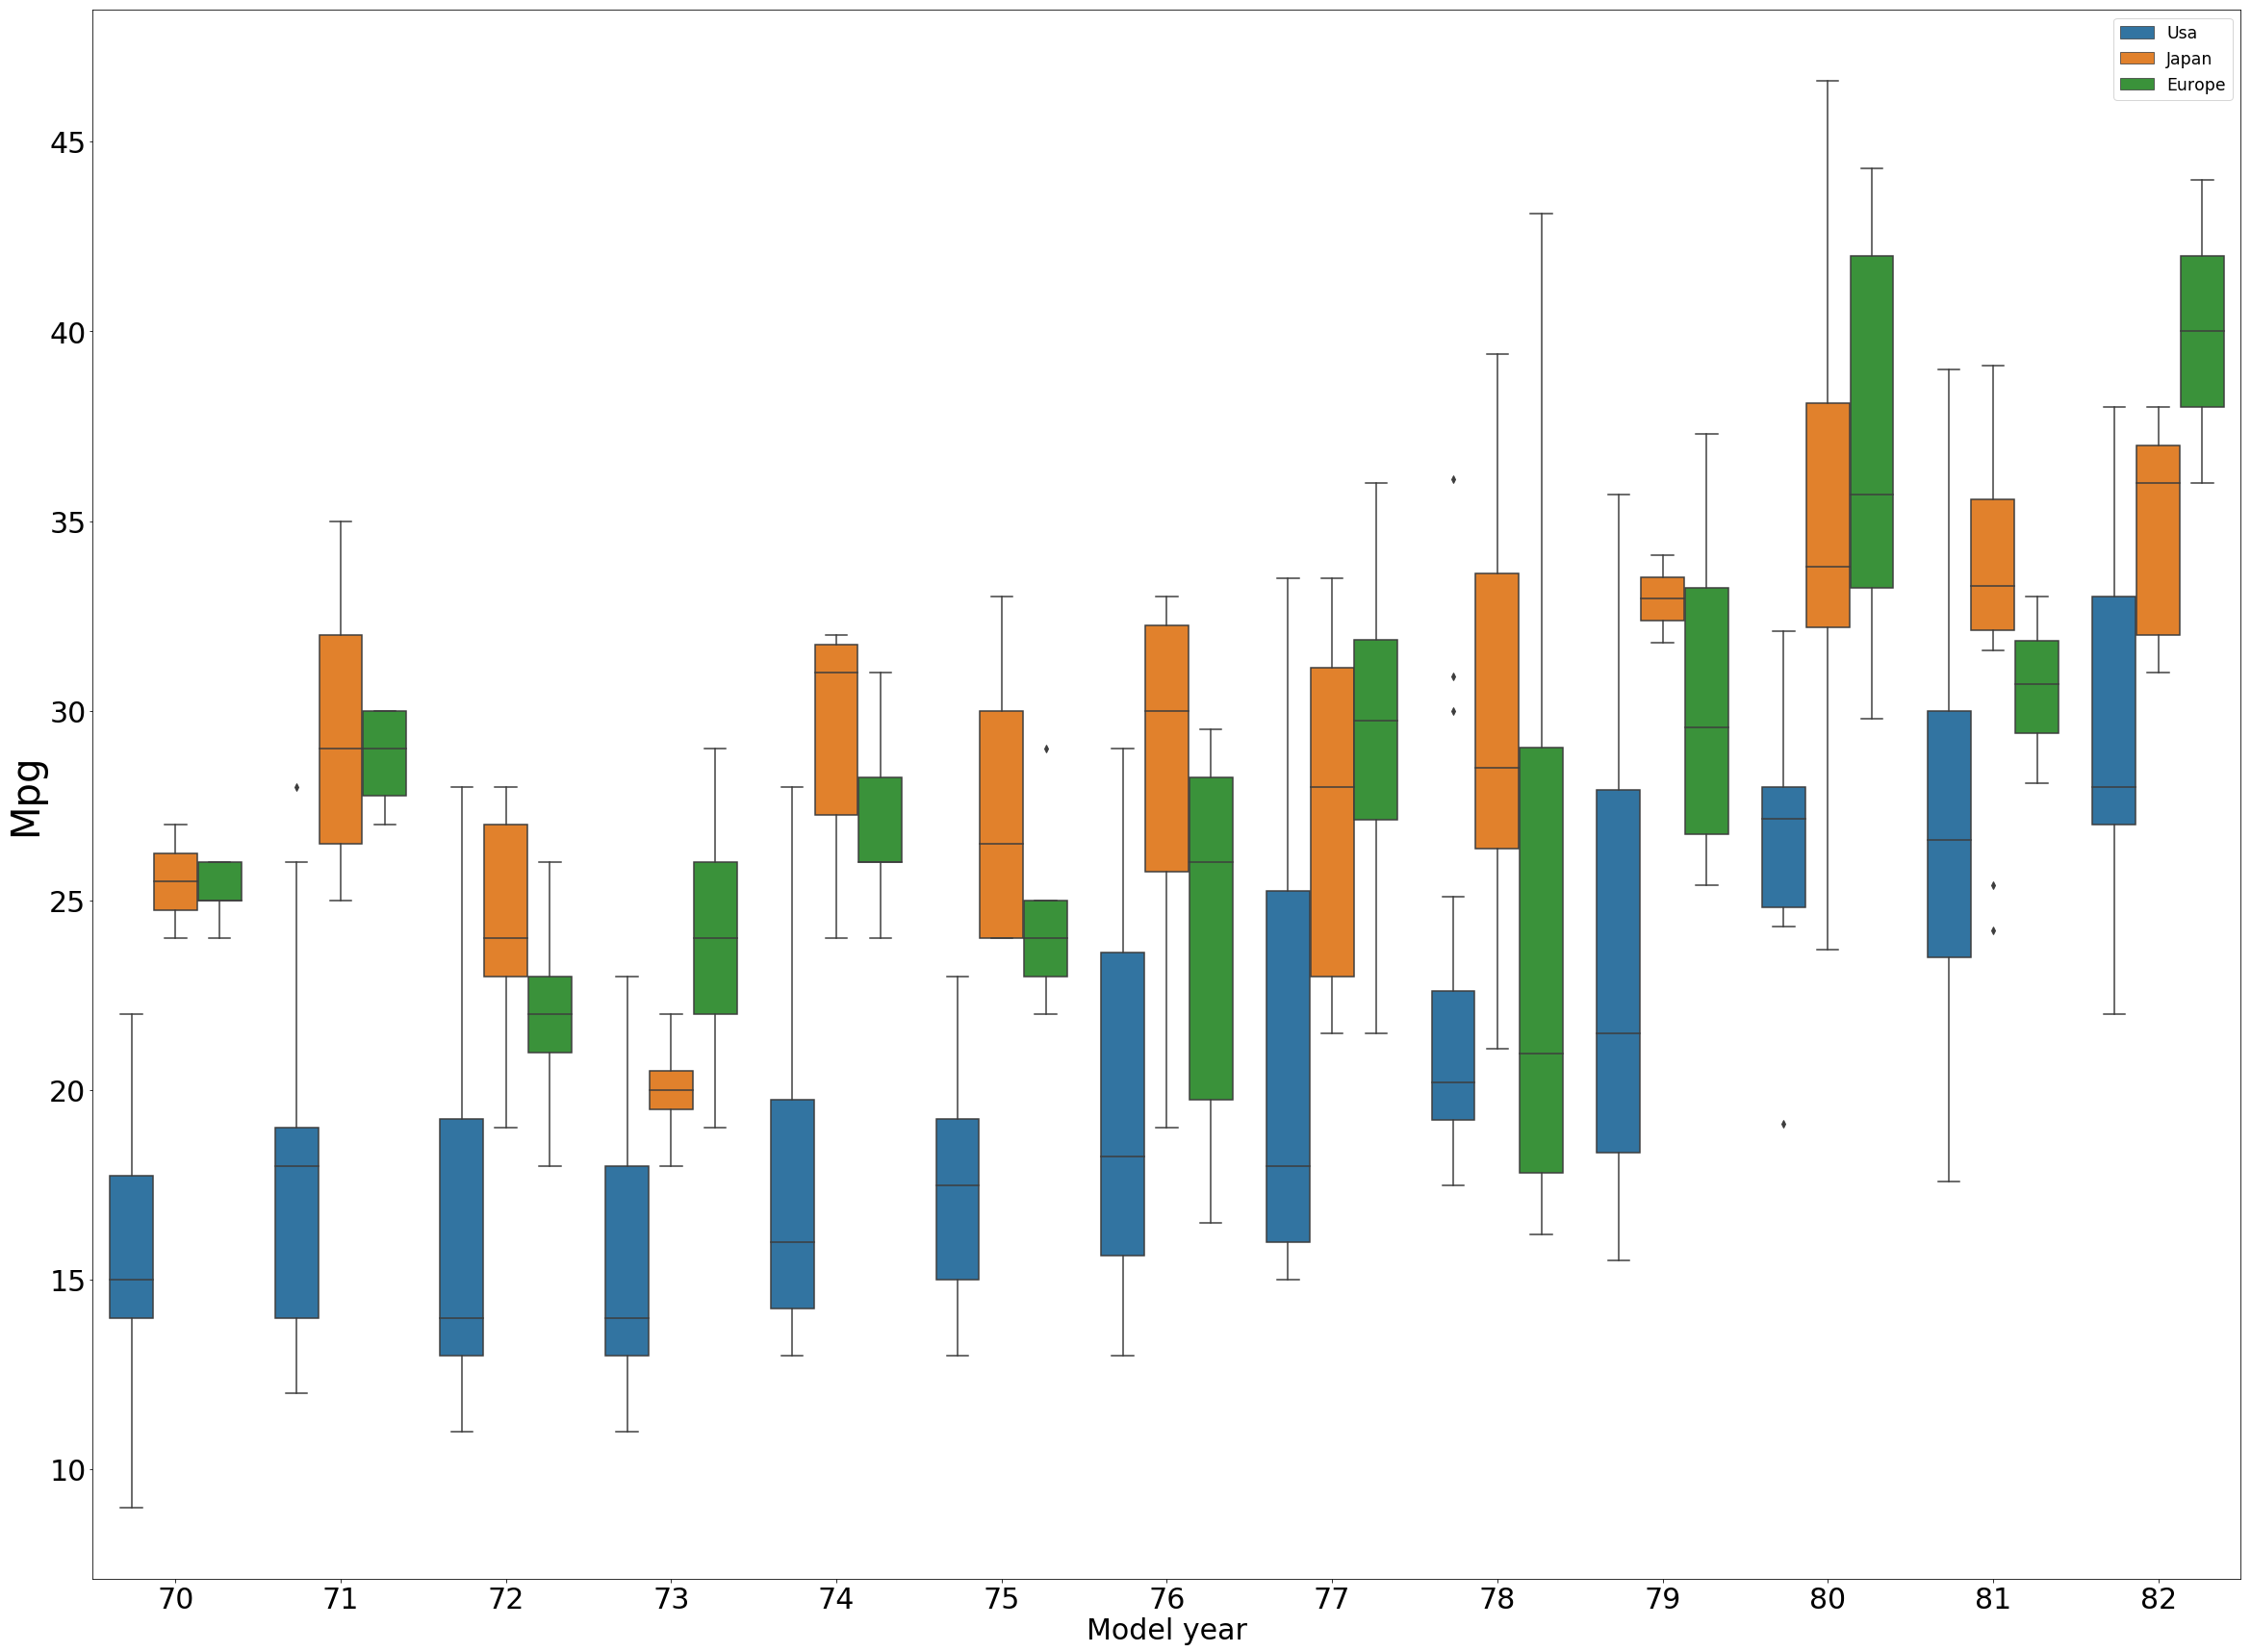

In [19]:
fig = plt.figure(figsize=(40,30))
fontsize2use = 30
plt.xticks(fontsize=fontsize2use) 
plt.yticks(fontsize=fontsize2use)
g= sns.boxplot(y= data['mpg'], x= data['model_year'], hue=data['country'])
g.set_xlabel('Model year',fontsize=30)
g.set_ylabel('Mpg',fontsize=40)
g.legend(fontsize ='xx-large')
 

#### From above graph we can see that Japanese and european cars gives better milage than Usa cars, but Mpg of Usa's cars is increasing with year

In [20]:
#Making dummy variables
dummies = pd.get_dummies(data['country'],drop_first=True)
data = pd.concat([data,dummies],axis=1)

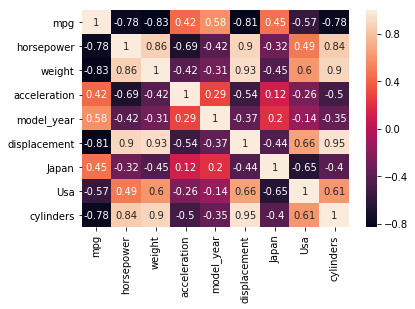

In [21]:
sns.heatmap(data[['mpg','horsepower','weight','acceleration','model_year','displacement','Japan','Usa','cylinders']].corr(), annot=True)

#### The above heatmap shows that weight, displacement,horsepower,cylinders,usa have negative correlationship with mpg

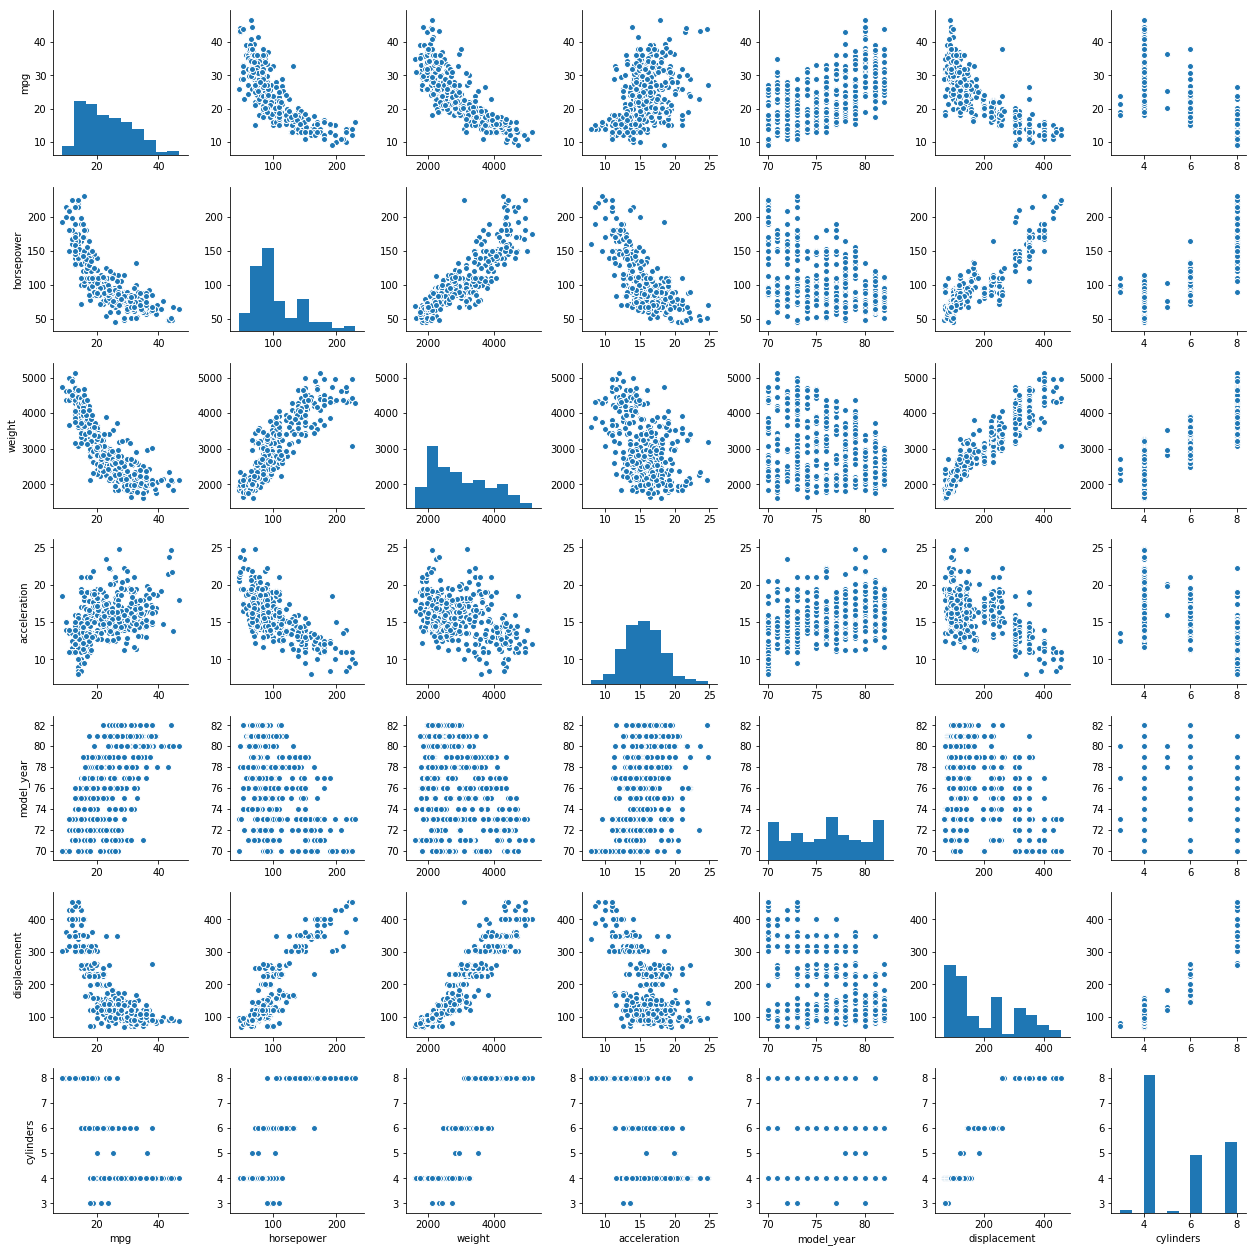

In [22]:
sns.pairplot(data[['mpg','horsepower','weight','acceleration','model_year','displacement','cylinders']])

In [23]:
x = data[['weight','displacement','Usa','model_year','horsepower','cylinders']]
y = data['mpg']

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.333, random_state=22)


In [25]:
lm = LinearRegression()
linreg = lm.fit(x_train, y_train)

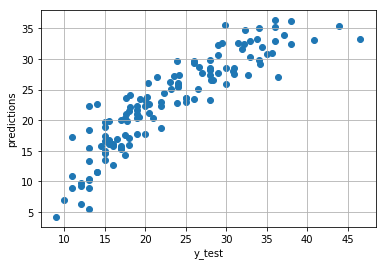

In [26]:
predictions = lm.predict(x_test)
plt.scatter(y_test,predictions)
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.grid()

### Regression Statistics

In [27]:
print('R-squared score (training): {:.3f}'.format(linreg.score(x_train, y_train)))
print('R-squared score (test): {:.3f}'.format(linreg.score(x_test, y_test)))

R-squared score (training): 0.824
R-squared score (test): 0.809


In [28]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.7915688508
MSE: 12.7565357132
RMSE: 3.57162927993


In [29]:
import statsmodels.api as sm
x_cons = sm.add_constant(x_train)
model = sm.OLS(y_train, x_cons)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     198.3
Date:                Fri, 09 Mar 2018   Prob (F-statistic):           8.11e-93
Time:                        22:30:04   Log-Likelihood:                -672.12
No. Observations:                 261   AIC:                             1358.
Df Residuals:                     254   BIC:                             1383.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -13.8172      4.869     -2.838   